# Multi-Label Text Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,hamming_loss,classification_report,f1_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv', index_col=0)

In [ ]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']


In [ ]:
type(df['Tags'].iloc[0])

str

In [ ]:
df['Tags'].value_counts()

['java']                            5894
['c#']                              4409
['android']                         4270
['python']                          4176
['c++']                             3689
                                    ... 
['c#', '.net', 'mysql']                1
['c#', 'java', 'python', 'c++']        1
['php', 'jquery', 'html', 'css']       1
['php', 'mysql', 'c']                  1
['jquery', 'ios', 'iphone']            1
Name: Tags, Length: 438, dtype: int64

In [ ]:
df.shape

(48976, 2)

In [ ]:
import ast
df['Tags'] = df['Tags'].apply(lambda x: ast.literal_eval(x))
tags = df['Tags']
tag_list = [el for sublist in tags for el in sublist]
print(tag_list)

['sql', 'asp.net', 'c#', '.net', 'c++', '.net', 'c#', 'c#', 'c#', 'asp.net', 'c#', '.net', 'c#', '.net', 'sql', 'sql', 'c#', 'html', 'c', 'asp.net', 'c#', 'sql', 'php', 'mysql', 'c++', 'c++', 'ruby', 'java', 'sql', 'asp.net', 'php', 'c#', '.net', 'java', 'c#', 'html', 'c#', '.net', 'sql', 'mysql', '.net', 'asp.net', 'javascript', 'java', 'c++', 'css', 'c#', '.net', 'c#', 'objective-c', 'c', '.net', 'sql', 'asp.net', 'c#', 'c', '.net', 'c++', 'java', '.net', 'php', 'c++', 'python', 'c', 'asp.net', 'java', 'asp.net', 'asp.net', 'java', 'php', 'mysql', 'c#', '.net', 'c#', '.net', 'sql', 'php', '.net', 'c++', 'c', 'javascript', 'java', 'c#', 'c#', 'java', 'c#', '.net', 'c#', 'c', 'c#', '.net', 'python', 'mysql', 'ruby-on-rails', '.net', 'javascript', 'asp.net', 'objective-c', '.net', 'java', '.net', 'c#', 'sql', '.net', 'asp.net', 'html', 'css', '.net', 'c', 'sql', 'ruby-on-rails', 'ruby', 'c#', 'ruby', 'php', 'c#', 'sql', 'ruby', 'css', 'java', 'c++', 'c', 'ruby', 'c#', 'asp.net', 'c#', '

In [ ]:
# tags = df['Tags']
# tags.value_counts()
# tag_list = [tag[1:-1].replace("'","").split(',') for tag in tags]
# tag_list = [el for sublist in tag_list for el in sublist]
# print(tag_list)

In [ ]:
# print(tag_list.value_counts())
from collections import Counter

print(len(Counter(tag_list)))

20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


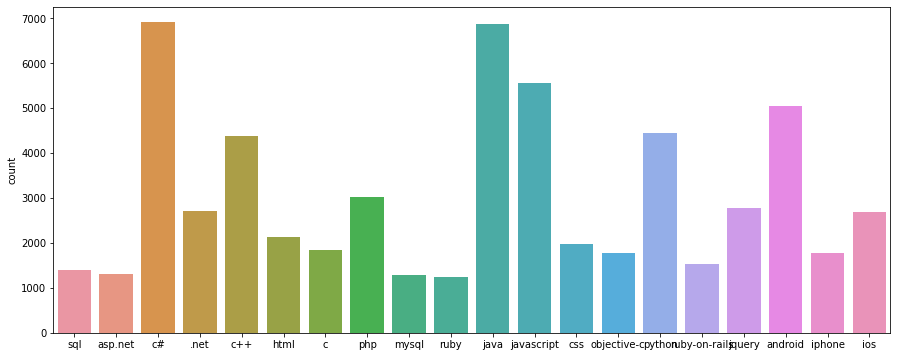

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(tag_list)

In [ ]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"[sql, asp.net]"
4,adding scripting functionality to net applicat...,"[c#, .net]"
5,should i use nested classes in this case i am ...,[c++]
6,homegrown consumption of web services i have b...,[.net]
8,automatically update version number i would li...,[c#]


In [ ]:
y = df['Tags']
y

2          [sql, asp.net]
4              [c#, .net]
5                   [c++]
6                  [.net]
8                    [c#]
                ...      
1262668             [c++]
1262834             [c++]
1262915          [python]
1263065          [python]
1263454             [c++]
Name: Tags, Length: 48976, dtype: object

In [ ]:
multilabel = MultiLabelBinarizer()

In [ ]:
y = multilabel.fit_transform(df['Tags'])

In [ ]:
y

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
multilabel.classes_

array(['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html',
       'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby', 'ruby-on-rails', 'sql'],
      dtype=object)

In [ ]:
pd.DataFrame(y, columns=multilabel.classes_)

,.net,android,asp.net,c,c#,c++,css,html,ios,iphone,java,javascript,jquery,mysql,objective-c,php,python,ruby,ruby-on-rails,sql
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48971,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48972,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# importing modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()
 
def stem_sent(sentence):
  # print(sentence)
  words = word_tokenize(sentence)
  stemmed_sent = [ ps.stem(w) for w in words]
  stemmed_sent = " ".join(stemmed_sent)
  return stemmed_sent

df['Text']= df['Text'].apply(stem_sent)
df.head()   

,Text,Tags
2,aspnet site map ha anyon got experi creat sqlb...,"[sql, asp.net]"
4,ad script function to net applic i have a litt...,"[c#, .net]"
5,should i use nest class in thi case i am work ...,[c++]
6,homegrown consumpt of web servic i have been w...,[.net]
8,automat updat version number i would like the ...,[c#]


In [ ]:
X = df['Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

\

```
# This is formatted as code
```

#  Model

In [ ]:


LR_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english',max_features=8000,ngram_range=(2, 3))),
                       ('lr_model', OneVsRestClassifier(LogisticRegression(C=2)))])

# SVM_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
#                        ('svm_model', OneVsRestClassifier(SVC(kernel='linear',probability=True)))])

SVM_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english',max_features=10000,ngram_range=(2, 3))),
                       ('svm_model', OneVsRestClassifier(LinearSVC(C=0.5)))])


In [ ]:
def run_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):

    pipe= pipeline.fit(train_feats, train_lbls)
    predictions = pipe.predict(test_feats)

    # print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('confusion matrices: ')
    # print(multilabel_confusion_matrix(test_lbls, predictions))
    print('classification_report: ')
    print(classification_report(test_lbls, predictions))
    print("Hamming loss", hamming_loss(test_lbls, predictions))
    return pipe


In [ ]:
pipe = run_pipeline(SVM_pipeline, X_train, y_train, X_test, y_test)

confusion matrices: 
classification_report: 
              precision    recall  f1-score   support

           0       0.61      0.10      0.17       542
           1       0.95      0.60      0.73       993
           2       0.78      0.16      0.27       280
           3       0.54      0.13      0.21       362
           4       0.72      0.36      0.48      1373
           5       0.82      0.38      0.52       884
           6       0.78      0.39      0.52       392
           7       0.53      0.16      0.24       447
           8       0.70      0.31      0.43       540
           9       0.65      0.18      0.29       349
          10       0.86      0.41      0.56      1386
          11       0.75      0.36      0.49      1099
          12       0.80      0.39      0.52       559
          13       0.80      0.37      0.51       262
          14       0.49      0.09      0.15       339
          15       0.86      0.37      0.51       609
          16       0.95      0.49   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# pipeline= run_pipeline(LR_pipeline, X_train, y_train, X_test, y_test)


In [ ]:
pipe

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(2, 3),
                                 stop_words='english')),
                ('svm_model', OneVsRestClassifier(estimator=LinearSVC(C=0.5)))])

## Testing

In [ ]:
x = [ 'beginners on programming nowadays mostly start with python but we used to start from c programming']
x = [ 'learning theory of ML was interesting but implementing logic using python was tough for me as I used to do programing in javascript before']
x =['python is great i like python you should try python']
# xt = pipe.predict(X_train[0])
type(df['Text'])
# multilabel.inverse_transform(pipe.predict(x))

KeyError: ignored

In [ ]:
xt

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
X_test.shape
X_train.shape

(39180, 10000)